# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


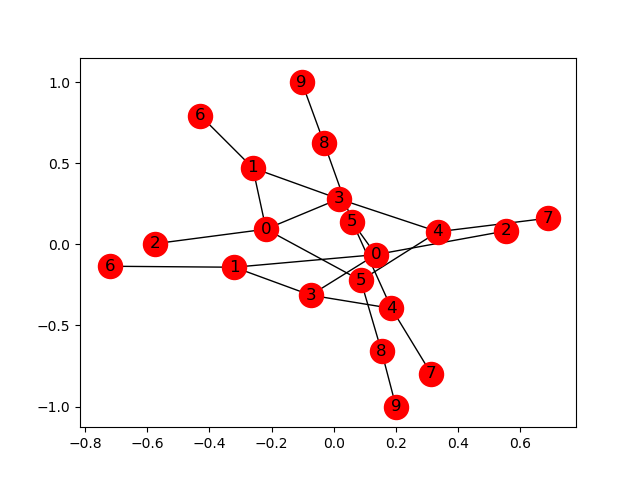

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

In [2]:

G=nx.MultiGraph()
G.add_node('A',role='manager')
G.add_edge('A','B',relation = 'friend')
G.add_edge('A','C', relation = 'business partner')
G.add_edge('A','B', relation = 'classmate')
G.node['A']['role'] = 'team member'
G.node['B']['role'] = 'engineer'


### Adjacency List

In [3]:
!cat G_adjlist.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

### Adjacency Matrix

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

In [ ]:
G3 = nx.Graph(G_mat)
G3.edges()

### Edgelist

In [11]:
!cat G_edgelist.txt
open('G_edgelist.txt','r').read()

'cat' is not recognized as an internal or external command,
operable program or batch file.


'0 1 4\n0 2 3\n0 3 2\n0 5 6\n1 3 2\n1 6 5\n3 4 3\n4 5 1\n4 7 2\n5 8 6\n8 9 1\n'

In [13]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)
# nx.draw_networkx(G4)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### Pandas DataFrame

In [12]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [15]:
G5 = nx.from_pandas_edgelist(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4}), (0, 2, {'weight': 3}), (0, 3, {'weight': 2}), (0, 5, {'weight': 6}), (1, 3, {'weight': 2}), (1, 6, {'weight': 5}), (3, 4, {'weight': 3}), (5, 4, {'weight': 1}), (5, 8, {'weight': 6}), (4, 7, {'weight': 2}), (8, 9, {'weight': 1})])

### Chess Example

In [ ]:
!head -5 chess_graph

In [ ]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [ ]:
chess.is_directed(), chess.is_multigraph()

In [ ]:
chess.edges(data=True)

In [ ]:
games_played = chess.degree()
games_played

In [ ]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

In [ ]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

In [ ]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

In [ ]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

In [ ]:
win_count.nlargest(5, 'outcome')